In [1]:
import json

In [3]:
import tensorflow as tf

In [1]:
records_path = "/home/aiops/zhuty/CS6220/language/downloaded_en_wiki_20181220/enwiki-20181220/titles.tfr"

In [2]:
from tqdm import tqdm

In [3]:
import tensorflow as tf
import json
from google.protobuf.json_format import MessageToJson

dataset = tf.data.TFRecordDataset(records_path)
idx_to_title = {}
for idx, d in tqdm(enumerate(dataset)):
    s = d.numpy()
    # a = json.loads(MessageToJson(d))
    idx_to_title[idx] = s
print(len(idx_to_title))
    # ex = tf.train.Example()
    # ex.ParseFromString(d.numpy())
    # m = json.loads(MessageToJson(ex))
    # print(m['features']['feature'].keys())

ModuleNotFoundError: No module named 'tensorflow'

In [34]:
records_path = "/home/aiops/zhuty/CS6220/language/downloaded_en_wiki_20181220/enwiki-20181220/blocks.tfr"
dataset = tf.data.TFRecordDataset(records_path)
idx_to_blocks = {}
for idx, d in tqdm(enumerate(dataset)):
    s = d.numpy()
    # a = json.loads(MessageToJson(d))
    idx_to_blocks[idx] = s
print(len(idx_to_blocks))

13353718it [17:59, 12374.32it/s]


13353718


In [33]:
records_path = "/home/aiops/zhuty/CS6220/language/downloaded_en_wiki_20181220/enwiki-20181220/examples.tfr"
dataset = tf.data.TFRecordDataset(records_path)
idx_to_examples = {}
for idx, d in tqdm(enumerate(dataset)):
    s = d.numpy()
    # a = json.loads(MessageToJson(d))
    idx_to_examples[idx] = s
print(len(idx_to_examples))

13353718it [16:45, 13275.02it/s]

13353718


In [36]:
idx_to_blocks[0]

b"HP LaserJet\n\nLaserJet as a brand name identifies the line of dry electrophotographic (DEP) laser printers marketed by the American computer company Hewlett-Packard (HP). The HP LaserJet was the world's first desktop laser printer. As of 2016, Canon supplies both mechanisms and cartridges for all HP's laser printers. HP LaserJet printers employ xerographic laser-marking engines sourced from the Japanese company Canon. Due to a very tight turnaround schedule on the first HP LaserJet, HP elected to use the controller already developed by Canon for the CX engine in the first HP LaserJet. The first HP LaserJet and the first Apple LaserWriter used the same print engine, the Canon CX engine. HP chose to use their in-house developed Printer Command Language (PCL) as opposed to Apple, which adopted the PostScript language, as developed by Adobe Systems. The use of a less-ambitious and simpler Page description language allowed HP to deliver its LaserJet to the market about a year before Appl

In [41]:
idx_to_title[0]

b'HP LaserJet'

In [51]:
len(set(idx_to_title.values()))

5514594

In [54]:
for i in idx_to_title:
    if idx_to_title[i].decode("UTF-8") == 'Aaron':
        print(idx_to_blocks[i])

b'Aaron\n\nAaron ( or ; "Ah\xc3\xa4r\xc3\xb4n") is a prophet, high priest, and the brother of Moses in the Abrahamic religions. Knowledge of Aaron, along with his brother Moses, comes exclusively from religious texts, such as the Bible and Quran. The Hebrew Bible relates that, unlike Moses, who grew up in the Egyptian royal court, Aaron and his elder sister Miriam remained with their kinsmen in the eastern border-land of Egypt (Goshen). When Moses first confronted the Egyptian king about the Israelites, Aaron served as his brother\'s spokesman ("prophet") to the Pharaoh. Part of the Law (Torah) that Moses received from God at Sinai granted Aaron the priesthood for himself and his male descendants, and he became the first High Priest of the Israelites. Aaron died before the Israelites crossed the North Jordan river and he was buried on Mount Hor (Numbers 33:39; Deuteronomy 10:6 says he died and was buried at Moserah). Aaron is also mentioned in the New Testament of the Bible. According 

In [50]:
for i in tqdm(idx_to_examples):
    title1 = (idx_to_title[i]).decode("UTF-8")
    print((idx_to_blocks[i]).decode("UTF-8"))
    title2 = (idx_to_blocks[i]).decode("UTF-8").split("\n\n")[0]
    assert title1 == title2, f"Title1 [{title1}], Title2 [{title2}]"

  0%|                                                                                                                        | 1/13353718 [00:00<19:57, 11155.06it/s]

HP LaserJet

LaserJet as a brand name identifies the line of dry electrophotographic (DEP) laser printers marketed by the American computer company Hewlett-Packard (HP). The HP LaserJet was the world's first desktop laser printer. As of 2016, Canon supplies both mechanisms and cartridges for all HP's laser printers. HP LaserJet printers employ xerographic laser-marking engines sourced from the Japanese company Canon. Due to a very tight turnaround schedule on the first HP LaserJet, HP elected to use the controller already developed by Canon for the CX engine in the first HP LaserJet. The first HP LaserJet and the first Apple LaserWriter used the same print engine, the Canon CX engine. HP chose to use their in-house developed Printer Command Language (PCL) as opposed to Apple, which adopted the PostScript language, as developed by Adobe Systems. The use of a less-ambitious and simpler Page description language allowed HP to deliver its LaserJet to the market about a year before Apple's 

AssertionError: Title1 [HP LaserJet], Title2 [HP introduced the first laser printer for IBM PC compatible personal computers in May 1984 at the Computer Dealers' Exhibition (COMDEX). It was a 300-dpi, 8 ppm printer that sold for $3,495 with the price reduced to $2,995 in September 1985, and featured an 8 MHz Motorola 68000 processor and could print in a variety of character fonts. It was controlled using PCL3. Due to the high cost of memory, the first LaserJet only had 128 kilobytes of memory, and a portion of that was reserved for use by the controller. The HP LaserJet printer had high print quality, could print horizontally or vertically, and produce graphics. It was ideal for printing memos, letters, and spreadsheets. It was quiet compared to other contemporary printers, so people could talk on the phone while sitting next to the HP LaserJet printer as it was printing. The first LaserJet was a high-speed replacement for text-only daisy wheel impact printers and dot matrix printers. By using control codes it was possible to change the printed text style using font patterns stored in permanent ROM in the printer. Although unsupported by HP, because the Laserjet used the same basic PCL language (PCL Level III) spoken by HP's other printers it was possible to use the Laserjet on HP 3000 multiuser systems.]

In [ ]:
idx_to_blocks[0]

## Plans for the experiment
Investigate compositionality

1. Prepare for different encoders (e.g. BM25, raw BERT, DPR with the title).
2. retrieval analysis.
3. perform clustering

Training with a different objective.

# Segmenting with natural segments (can use pyserini?)

pubmed QA? I think it is a stretch goal.


Retrieval with natural segment (use blocks for retrieval)

### Explore the paragraph segmented tf records

In [9]:
from tqdm import tqdm
import tensorflow as tf


2023-04-10 06:02:52.814091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 06:02:54.031014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
records_path = "/home/aiops/zhuty/CS6220/language/paragraph_blocks_en_wiki_20181220/blocks.tfr"
dataset = tf.data.TFRecordDataset(records_path)
idx_to_blocks = {}
for idx, d in tqdm(enumerate(dataset)):
    s = d.numpy()
    # a = json.loads(MessageToJson(d))
    idx_to_blocks[idx] = s
print(len(idx_to_blocks))

2023-04-10 06:02:58.726880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9059 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-04-10 06:02:58.729385: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38370 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:91:00.0, compute capability: 8.0
2023-04-10 06:02:58.895080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
38269408it [52:27, 12157.62it/s]


38269408


In [ ]:
records_path = "/home/aiops/zhuty/CS6220/language/paragraph_blocks_en_wiki_20181220/titles.tfr"
dataset = tf.data.TFRecordDataset(records_path)
idx_to_title = {}
for idx, d in tqdm(enumerate(dataset)):
    s = d.numpy()
    # a = json.loads(MessageToJson(d))
    idx_to_title[idx] = s
print(len(idx_to_title))

2023-04-10 06:55:26.785397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
29625010it [39:17, 12772.69it/s]

In [ ]:
import csv

In [17]:
len(idx_to_title)

38269408

In [18]:
len(idx_to_blocks)

38269408

In [19]:
len(set(idx_to_title.values()))

5514592

In [12]:
# written_lines = 0
# with open("/home/aiops/zhuty/CS6220/language/paragraph_blocks_en_wiki_20181220/paragraphs.tsv", "w", 2**20) as f_write:
#     f_write = csv.writer(f_write, delimiter='\t', quotechar='"')
#     for idx, block in idx_to_blocks.items():
#         title = idx_to_title[idx].decode("UTF-8")
#         block = block.decode("UTF-8")
#         if block.strip() == title.strip():
#             continue
#         f_write.writerow([idx, title, block])
#         written_lines += 1
# print(f"Written lines {written_lines}")

In [20]:
import jsonlines

In [ ]:
# write to lucene format


In [22]:
# write to FAISs format
dump_dict = [{"id": passage_id, "contents": f"{block}\n"} for passage_id, block in idx_to_blocks.items()]
outpath = "/mnt/cache/zhuty/CS6220_data/DPR_paragraph_pyserini_version.jsonl"
actual = dump_dict
print(len(actual))
with jsonlines.open(outpath, 'w') as writer:
    writer.write_all(actual)

38269408


In [24]:
import json

In [26]:
outpath_lucene = "/mnt/cache/zhuty/CS6220_data/DPR_paragraph_pyserin_lucene/docs.json"
json.dump(actual, open(outpath_lucene, "w"))

### Analyze the title and paragraph relationships

In [35]:
from collections import Counter

In [36]:
title_to_p = {}
for idx, block in idx_to_blocks.items():
    title = idx_to_title[idx]
    if title not in title_to_p:
        title_to_p[title] = []
    title_to_p[title].append(block)


In [37]:
counter = Counter([len(x) for x in title_to_p.values()])
print("Length frequency counter ", counter)

Length frequency counter  Counter({2: 1434310, 3: 816508, 4: 633498, 5: 478561, 6: 374860, 7: 294591, 8: 232490, 9: 183857, 10: 146399, 11: 118436, 12: 98610, 13: 81494, 14: 67679, 15: 56844, 16: 48441, 17: 42050, 18: 35453, 1: 34941, 19: 31055, 20: 27137, 21: 24164, 22: 21248, 23: 18781, 24: 16697, 25: 14986, 26: 13388, 27: 11906, 28: 10973, 29: 9982, 30: 8944, 31: 8191, 32: 7398, 33: 6853, 34: 6311, 35: 5733, 36: 5297, 37: 5034, 38: 4563, 39: 4205, 40: 3889, 41: 3606, 42: 3369, 43: 3256, 44: 2988, 45: 2806, 46: 2606, 47: 2517, 48: 2344, 50: 2070, 49: 2063, 51: 1955, 52: 1875, 53: 1784, 54: 1640, 55: 1498, 56: 1495, 58: 1357, 57: 1275, 59: 1241, 60: 1116, 61: 1082, 62: 1022, 63: 999, 65: 961, 64: 930, 66: 866, 67: 846, 68: 758, 69: 755, 70: 698, 71: 678, 72: 643, 73: 589, 75: 578, 74: 567, 77: 546, 76: 543, 78: 464, 80: 446, 79: 444, 81: 429, 82: 412, 85: 400, 83: 380, 84: 371, 87: 349, 86: 334, 89: 307, 88: 301, 91: 291, 92: 257, 90: 256, 94: 253, 93: 245, 95: 239, 97: 219, 98: 208, 

b'Tallaght Strategy'

In [45]:
title = list(title_to_p.keys())[2]

[b'Red-veined darter',
 b'The red-veined darter or nomad ("Sympetrum fonscolombii") is a dragonfly of the genus "Sympetrum".',
 b'There is genetic and behavioural evidence that "S. fonscolombii" is not closely related to the other members of the genus "Sympetrum" and it will at some time in the future be removed from this genus.',
 b'"Sympetrum fonscolombii" was named under the protonym " Libellula fonscolombii " by the Belgian entomologist Edmond de S\xc3\xa9lys Longchamps, in 1840, in honor of the French entomologist \xc3\x89tienne of Fonscolombe (hence the species name). Its name is sometimes spelt "fonscolombei" instead of "fonscolombii" but Askew (2004) gives the latter as the correct spelling.',
 b'"Sympetrum fonscolombii" is a widespread and common species in much of central and southern Europe including most Mediterranean islands, North Africa, the Middle East, Mongolia, south-western Asia, including the Indian Subcontinent, the Indian Ocean Islands and Sri Lanka. In Europe it 

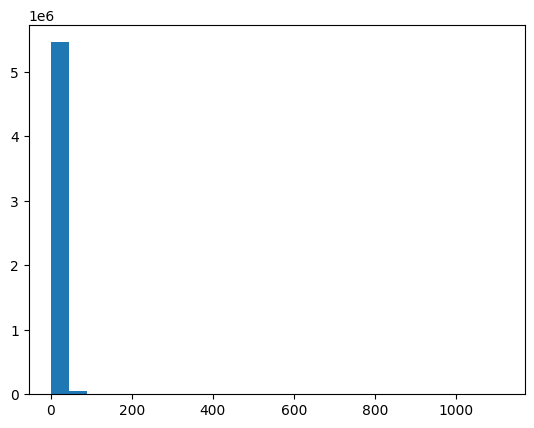

In [40]:
import matplotlib.pyplot as plt
# Get a list of the dictionary values
values_list = list([len(x) for x in title_to_p.values()])
# Plot a histogram of the values
plt.hist(values_list, bins = 25 )
# Show the plot
plt.show()